In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt

%matplotlib inline

##### EXPLANATION OF %matplotlib inline
%matplotlib inline is a "magic command" specific to IPython environments, such as Jupyter Notebooks. It configures Matplotlib to display plots directly within the notebook output, rather than in separate windows.

In [2]:
df_airline = pd.read_csv(r'C:\Users\USER\Desktop\projects\project3_sarima\AirPassengers.csv')
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [4]:
df_airline

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Note that the Month column is of object Dtype so we convert to datetime

In [6]:
from datetime import datetime

In [7]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df_airline.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Then we set Month column as index

In [10]:
df_airline.set_index('Month', inplace=True)

In [11]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


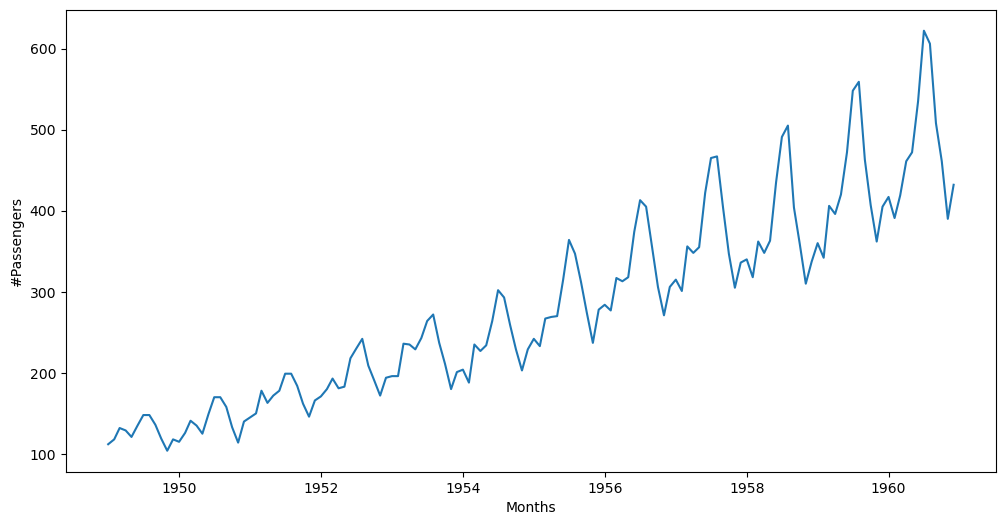

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_airline)
plt.xlabel("Months")
plt.ylabel('#Passengers')
plt.show()

#### Checking stationarity using Adfuller Dicky Test

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_airline['#Passengers'])
print(f"ADF Statistics: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistics: 0.8153688792060597
P-Value: 0.9918802434376411


#### DIFFERENCING

Since data is not stationary we apply differencing

In [14]:
df_airline['Passengers_first_difference']=df_airline["#Passengers"] - df_airline["#Passengers"].shift(1)

In [15]:
df_airline.head()

,#Passengers,Passengers_first_difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


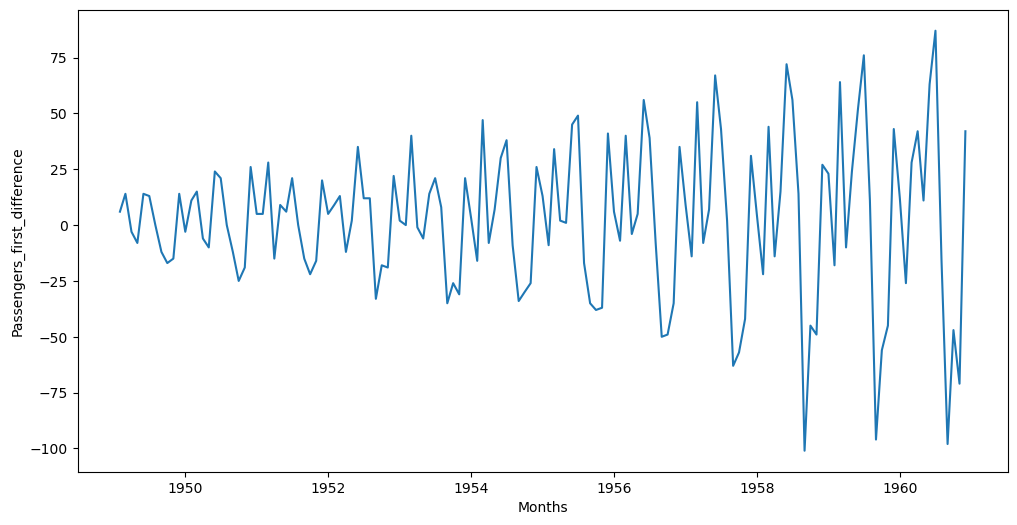

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df_airline['Passengers_first_difference'])
plt.xlabel("Months")
plt.ylabel('Passengers_first_difference')
plt.show()

#### Checking stationarity again with ADF

In [17]:
result = adfuller(df_airline['Passengers_first_difference'].dropna())
print(f"ADF Statistics: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistics: -2.829266824169992
P-Value: 0.0542132902838265


##### APPLYING SECOND DIFFERENCING

In [18]:
df_airline['Passengers_second_difference'] = df_airline["Passengers_first_difference"] - df_airline['Passengers_first_difference'].shift(1)

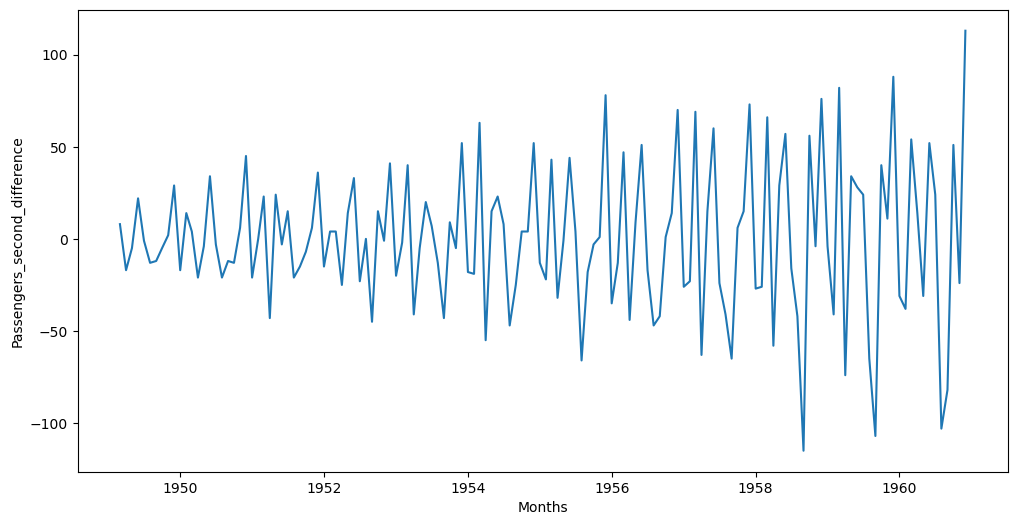

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df_airline['Passengers_second_difference'])
plt.xlabel("Months")
plt.ylabel('Passengers_second_difference')
plt.show()

#### Checking stationarity again with ADF

In [20]:
result = adfuller(df_airline['Passengers_second_difference'].dropna())
print(f"ADF Statistics: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistics: -16.384231542468527
P-Value: 2.732891850014085e-29


In [21]:
#12 month differencing cause its a seasonal data

df_airline['12 month difference']= df_airline["#Passengers"] - df_airline["#Passengers"].shift(12)

In [22]:
result = adfuller(df_airline['12 month difference'].dropna())
print(f"ADF Statistics: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistics: -3.3830207264924805
P-Value: 0.011551493085514982


#### plotting PACF and ACF

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

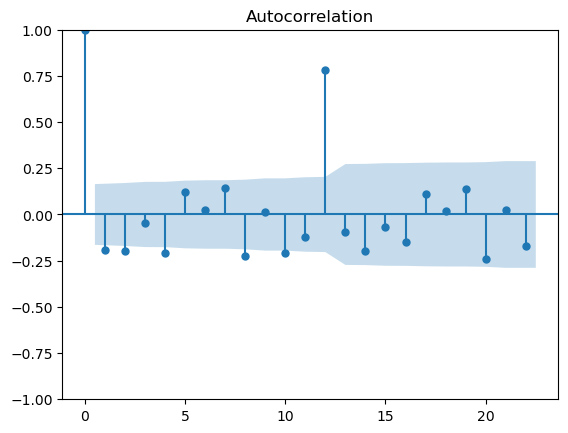

In [24]:
plot_acf(df_airline['Passengers_second_difference'].dropna())

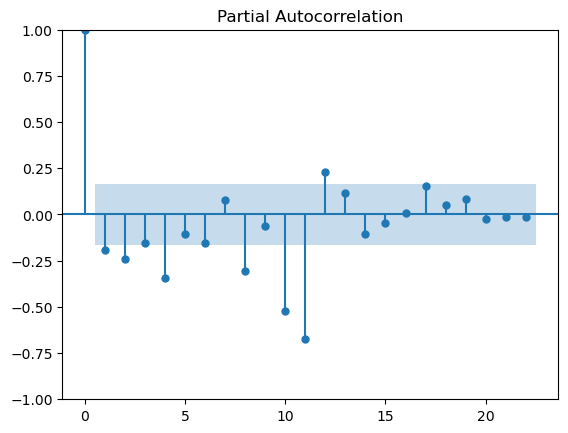

In [25]:
plot_pacf(df_airline['Passengers_second_difference'].dropna())

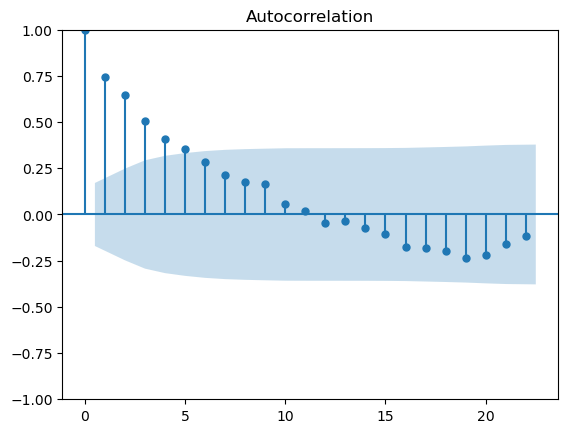

In [26]:
plot_acf(df_airline['12 month difference'].dropna())

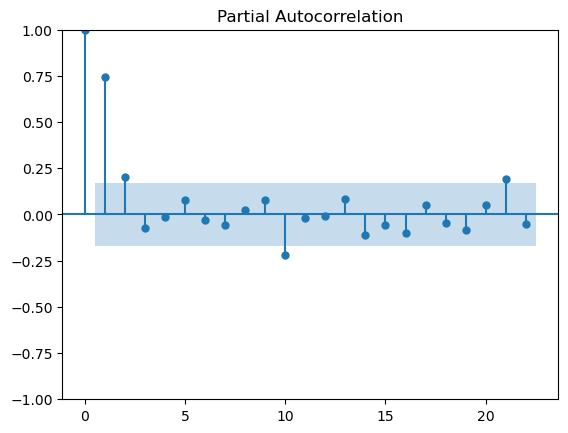

In [27]:
plot_pacf(df_airline['12 month difference'].dropna())

In [28]:
# split train and test data
df_airline

,#Passengers,Passengers_first_difference,Passengers_second_difference,12 month difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [29]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [30]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [31]:
test_data

,#Passengers,Passengers_first_difference,Passengers_second_difference,12 month difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [32]:
train_data

,#Passengers,Passengers_first_difference,Passengers_second_difference,12 month difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [33]:
from statsmodels.tsa.arima.model import ARIMA

#fit the model
model = ARIMA(df_airline['#Passengers'], order = (0, 2, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -724.298
Date:                Tue, 17 Jun 2025   AIC                           1450.596
Time:                        02:54:18   BIC                           1453.552
Sample:                    01-01-1949   HQIC                          1451.797
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1577.3620    171.458      9.200      0.000    1241.311    1913.413
Ljung-Box (L1) (Q):                   5.29   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.02   Pr

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### ✅ What Looks Great:
AIC = 1344.10
→ Much lower than your previous model (1391.91) → Better fit.

All AR terms (L1–L10) are:

- Statistically significant (all p-values < 0.01).

- Well-estimated with reasonable standard errors.

- Suggests strong autocorrelation structure is captured well.

- sigma² is much lower (614 vs 965 previously) with a precise standard error → less residual noise.

- No extreme skewness or kurtosis (JB p-value = 0.17) → residuals are close to normally distributed.

##### ⚠️ What You Should Watch:
- Ljung-Box Q-statistic = 37.01, p = 0.00
→ Suggests residuals may still have autocorrelation (bad sign for forecast accuracy).
- You should check residual ACF plots to confirm.

- Heteroskedasticity (H = 3.3, p = 0.00)
→ Variance of residuals is not constant, which might affect prediction intervals.

AR(10) might be overfitting — using 10 lags is a lot for just 144 data points. Simpler models may perform similarly with less complexity.

##### 🧠 Verdict:
- ✅ Better than the previous model.
- ✅ All coefficients are strong and significant.
- ⚠️ Might be overfit and could suffer from non-constant variance and residual autocorrelation.

##### ✅ What You Can Try Next:
- Plot residual ACF/PACF.

- Compare with ARIMA(5,2,2) or SARIMA, especially if there’s monthly/seasonal structure.

- Optionally try ARIMA(10,2,0) with differencing pre-applied, to check if d=2 is truly necessary.

In [34]:
test_data

,#Passengers,Passengers_first_difference,Passengers_second_difference,12 month difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [35]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [36]:
pred=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

In [37]:
pred

1956-01-01    319.0
1956-02-01    290.0
1956-03-01    270.0
1956-04-01    357.0
1956-05-01    309.0
1956-06-01    323.0
1956-07-01    430.0
1956-08-01    452.0
1956-09-01    397.0
1956-10-01    305.0
1956-11-01    257.0
1956-12-01    236.0
1957-01-01    341.0
1957-02-01    324.0
1957-03-01    287.0
1957-04-01    411.0
1957-05-01    340.0
1957-06-01    362.0
1957-07-01    489.0
1957-08-01    508.0
1957-09-01    469.0
1957-10-01    341.0
1957-11-01    290.0
1957-12-01    263.0
1958-01-01    367.0
1958-02-01    344.0
1958-03-01    296.0
1958-04-01    406.0
1958-05-01    334.0
1958-06-01    378.0
1958-07-01    507.0
1958-08-01    547.0
1958-09-01    519.0
1958-10-01    303.0
1958-11-01    314.0
1958-12-01    261.0
1959-01-01    364.0
1959-02-01    383.0
1959-03-01    324.0
1959-04-01    470.0
1959-05-01    386.0
1959-06-01    444.0
1959-07-01    524.0
1959-08-01    624.0
1959-09-01    570.0
1959-10-01    367.0
1959-11-01    351.0
1959-12-01    317.0
1960-01-01    448.0
1960-02-01    429.0


In [38]:
residuals

Month
1956-01-01    -35.0
1956-02-01    -13.0
1956-03-01     47.0
1956-04-01    -44.0
1956-05-01      9.0
1956-06-01     51.0
1956-07-01    -17.0
1956-08-01    -47.0
1956-09-01    -42.0
1956-10-01      1.0
1956-11-01     14.0
1956-12-01     70.0
1957-01-01    -26.0
1957-02-01    -23.0
1957-03-01     69.0
1957-04-01    -63.0
1957-05-01     15.0
1957-06-01     60.0
1957-07-01    -24.0
1957-08-01    -41.0
1957-09-01    -65.0
1957-10-01      6.0
1957-11-01     15.0
1957-12-01     73.0
1958-01-01    -27.0
1958-02-01    -26.0
1958-03-01     66.0
1958-04-01    -58.0
1958-05-01     29.0
1958-06-01     57.0
1958-07-01    -16.0
1958-08-01    -42.0
1958-09-01   -115.0
1958-10-01     56.0
1958-11-01     -4.0
1958-12-01     76.0
1959-01-01     -4.0
1959-02-01    -41.0
1959-03-01     82.0
1959-04-01    -74.0
1959-05-01     34.0
1959-06-01     28.0
1959-07-01     24.0
1959-08-01    -65.0
1959-09-01   -107.0
1959-10-01     40.0
1959-11-01     11.0
1959-12-01     88.0
1960-01-01    -31.0
1960-02-01    

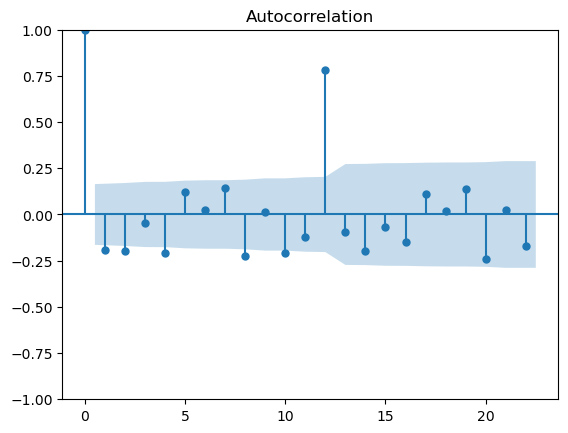

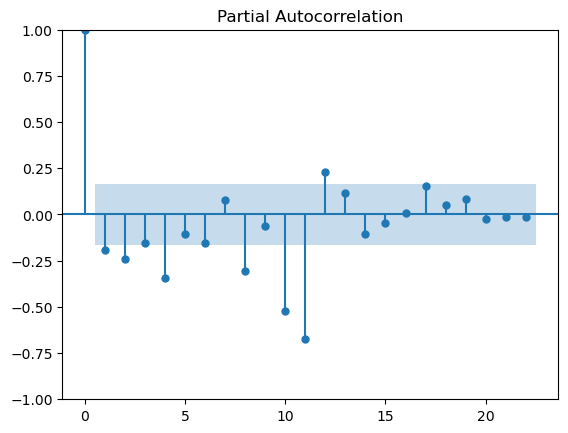

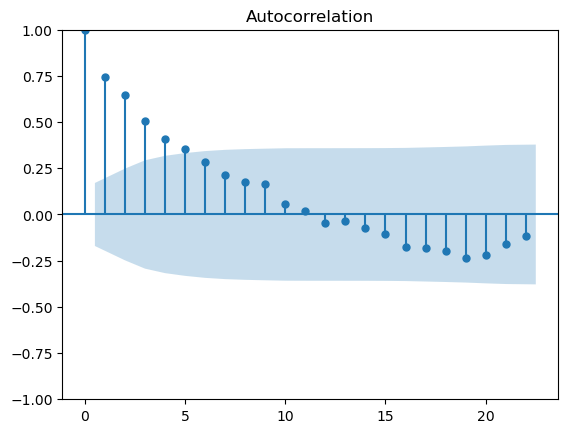

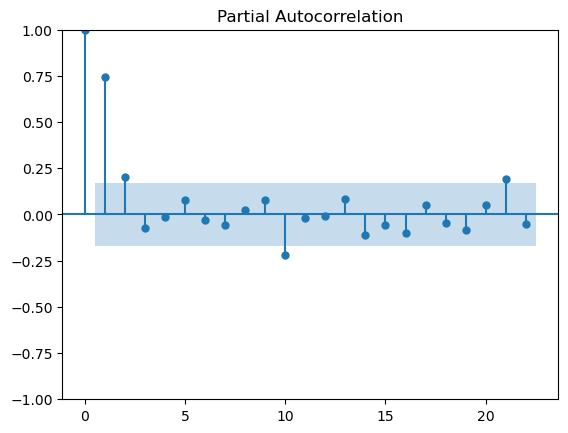

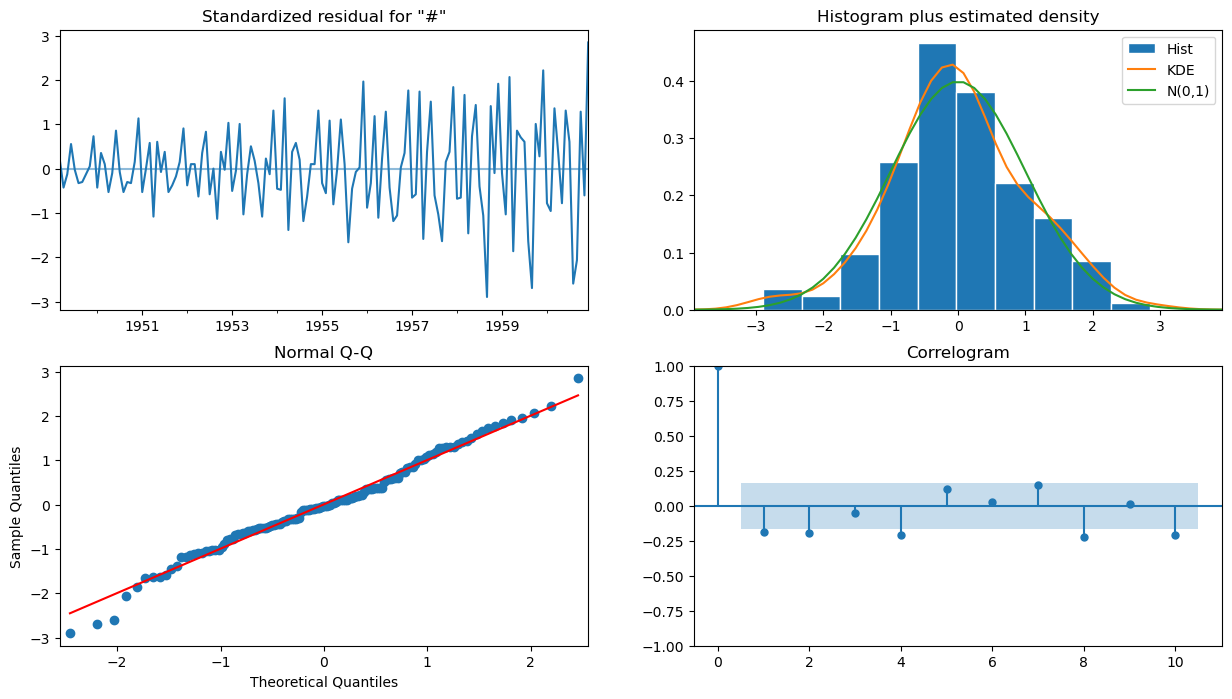

In [39]:
model_fit.plot_diagnostics(figsize= (15, 8))
plt.show()

In [40]:
test_data['Predicted_ARIMA']=pred

C:\Users\USER\AppData\Local\Temp\ipykernel_8012\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


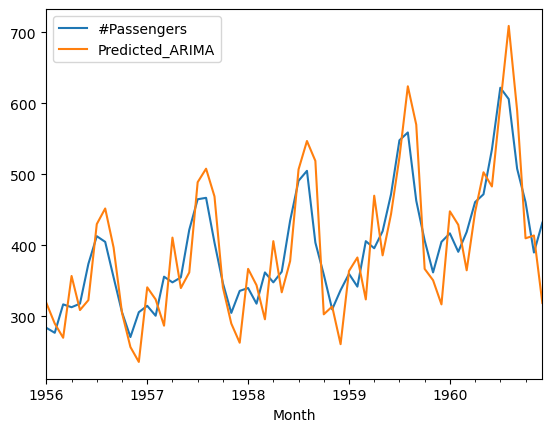

In [41]:
test_data[['#Passengers','Predicted_ARIMA']].plot()
plt.show()

#### Trying Sarimax

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [43]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
model_SARIMA_fit=model_SARIMA.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 17 Jun 2025   AIC                            548.481
Time:                                     02:54:21   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5982      0.937      0.638      0.523      -1.239       2.435
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.164      0.158      0.874      -2.097       2.465
ma.L2         -0.5340      1.262     -0.423      0.672      -3.007       1.939
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7334     81.111      1.082      0.279     -71.240     246.707
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
test_data.tail()

,#Passengers,Passengers_first_difference,Passengers_second_difference,12 month difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,709.0
1960-09-01,508,-98.0,-82.0,45.0,590.0
1960-10-01,461,-47.0,51.0,54.0,410.0
1960-11-01,390,-71.0,-24.0,28.0,414.0
1960-12-01,432,42.0,113.0,27.0,319.0


In [47]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [48]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

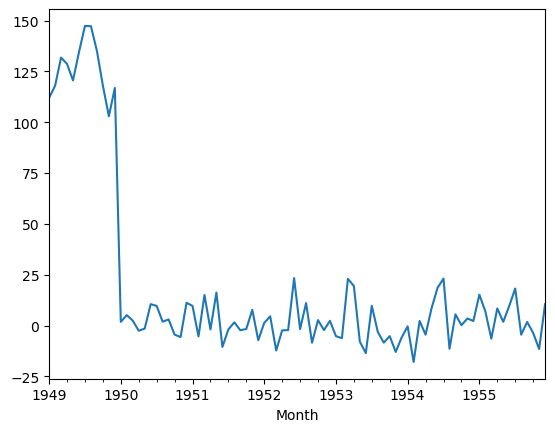

In [49]:
model_SARIMA_fit.resid.plot()
plt.show()

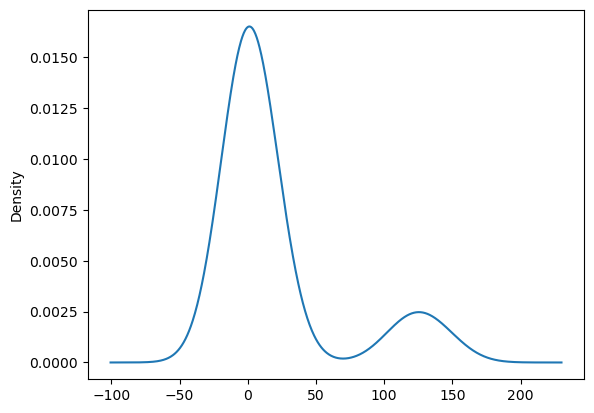

In [50]:
model_SARIMA_fit.resid.plot(kind='kde')
plt.show()

In [51]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\USER\AppData\Local\Temp\ipykernel_8012\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


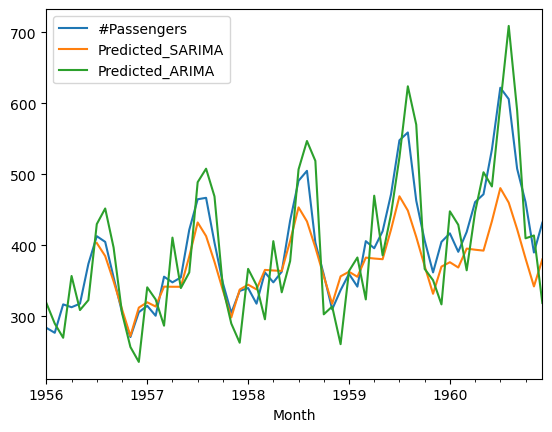

In [52]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
plt.show()